#  We want to find the difference from the EOM of the backwards inferred solutions, using different methods

We will generate the curve in the same way

##  First let's try the one by one displacements

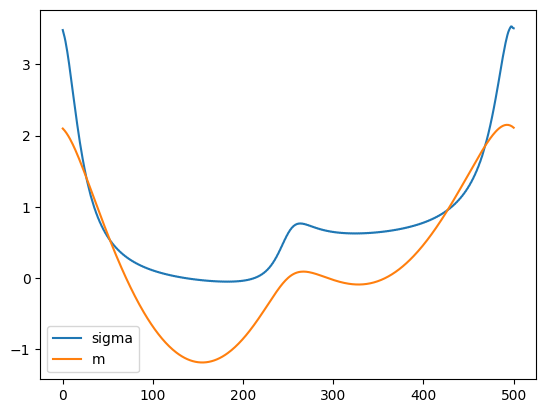

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from helper_functions import backward_solver

N_curve = 200
N_interp = 501
R = 1
L = 2 * np.pi * R
thetaspan = 2 * np.pi

thetas = np.linspace(0, thetaspan * (N_curve-1)/(N_curve), N_curve)
thetas = thetas + thetaspan / N_curve / 2

xs = 2 * R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

delta_s = L / N_interp
sigmas, ms = backward_solver(curve, L, N_interp)

plt.plot(sigmas, label='sigma')
plt.plot(ms, label='m')
plt.legend()
plt.show()

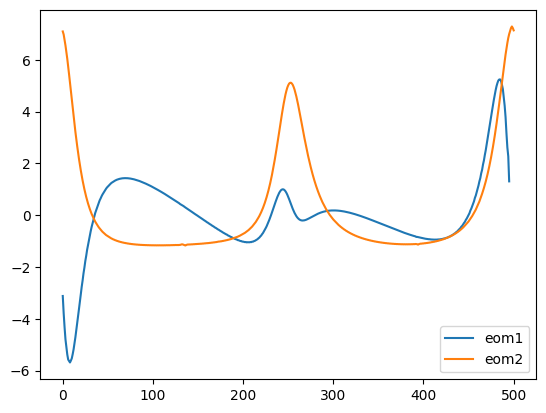

In [6]:
from helper_functions import dps

tns = - dps(ms) / delta_s
dtns = dps(tns) / delta_s
dsigmas = dps(sigmas) / delta_s

eom1 = dsigmas + tns / R
eom2 = dtns - sigmas / R + 1

plt.plot(eom1[2:-3], label='eom1')
plt.plot(eom2, label='eom2')
plt.legend()
plt.show()

##  Next the others

a surprise to be sure, but a welcome one


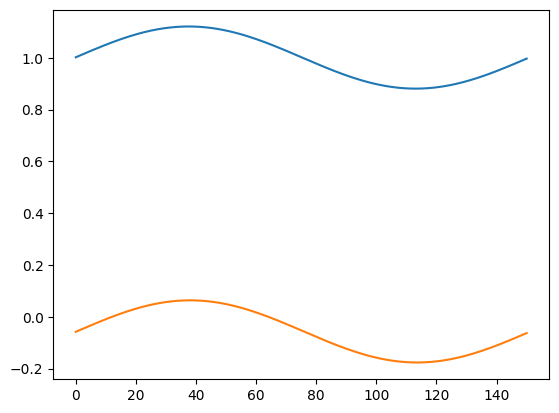

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from helper_functions import *

N_curve = 200
N_interp = 151
R = 1
L = 2 * np.pi * R
delta_s = L / N_interp
thetaspan = 2 * np.pi

thetas = np.linspace(0, thetaspan * (N_curve-1)/(N_curve), N_curve)
thetas = thetas + thetaspan / N_curve / 2

# thetas = np.linspace(0, thetaspan * N_points/(N_points + 1), N_points)

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

sigmas, ms = backward_solver_set(curve, 2*np.pi*R, N_interp)

plt.plot(sigmas, label='sigma')
plt.plot(ms, label='m')

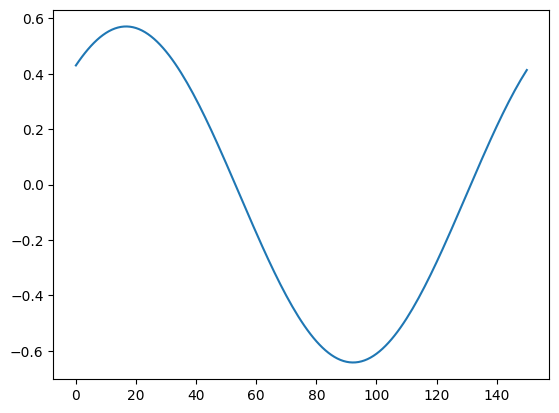

In [7]:
plt.plot(ms)

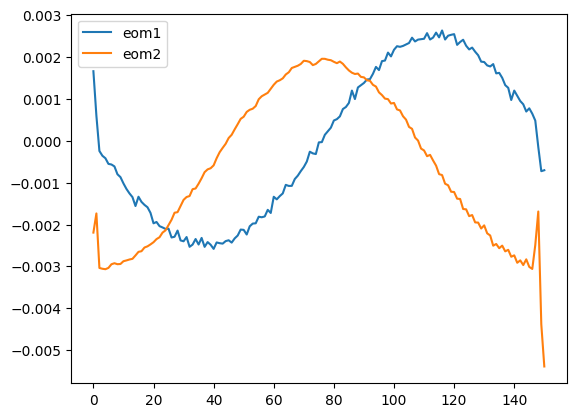

In [8]:
from helper_functions import dps

tns = - dps(ms) / delta_s
dtns = dps(tns) / delta_s
dsigmas = dps(sigmas) / delta_s

eom1 = dsigmas + tns / R
eom2 = dtns - sigmas / R + 1

plt.plot(eom1, label='eom1')
plt.plot(eom2, label='eom2')
plt.legend()
plt.show()

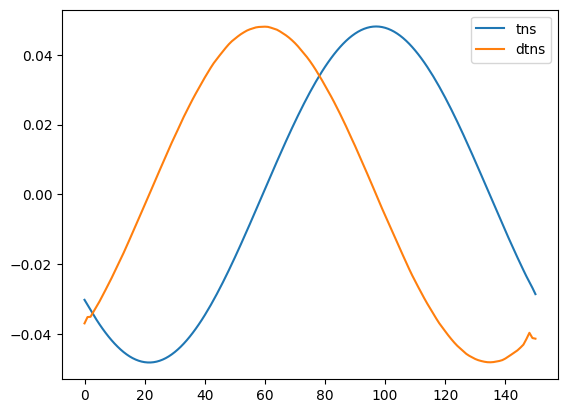

In [17]:
plt.plot(tns, label='tns')
plt.plot(dtns, label='dtns')
plt.legend()

In [21]:
tns[0] - tns[-1]

np.float64(-0.0016386390263720546)

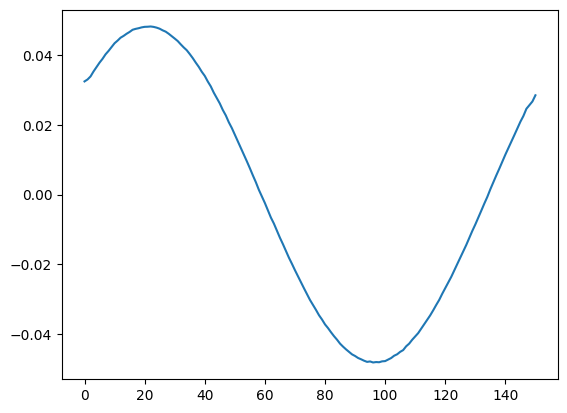

In [20]:
plt.plot(dsigmas, label='sigmas')